# Stiff Rearrangement Simulations

Analysis of the data for scaling of stiff rerng simulations

In [2]:
from matplotlib.pyplot import *
import numpy as np
import pandas as pd
from numpy import array as arr

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.style

In [5]:
style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [6]:
style.use('default')

# header

In [7]:
import matplotlib as mpl
mpl.rc('font', family='cmr10') 
mpl.rcParams['axes.unicode_minus']= False
mpl.rcParams['mathtext.fontset'] = 'cm'
#mpl.rc('font', serif='Helvetica Neue') 
mpl.rc('font', size=9) 

In [8]:
def getRerngCalcResults(f_addr, s):
    """
    Basically just parses, sorts, and does some very basic calculations on the raw files.
    """
    df = pd.read_table(f_addr, sep=',',header=None)
    xpts = [x.tolist()[0] for _,x in df.iterrows()]
    data = [x.tolist()[1:-1] for _,x in df.iterrows()]
    dataAvg = arr([np.mean(y)*100 for y in data])
    boolData = [[bool(y) for y in x] for x in data]
    boolAvg = arr([np.mean(y)*100 for y in boolData])
    singleAvg = arr([x**(s**2)*100  if x != 0 else 0 for x in xpts])
    xpts_p = [x*100 for x in xpts]
    return xpts_p, dataAvg, boolAvg, singleAvg

Load original data, also does some simple calculations which are also used with newer data

In [9]:
#x, avgSols_2, boolAvg_2, singleAvg_2 = getRerngCalcResults("Rearrange_Results_2x2.csv",3)
x, avgSols_3, boolAvg_3, singleAvg_3 = getRerngCalcResults("Rearrange_Results_3x3.csv",3)
x, avgSols_4, boolAvg_4, singleAvg_4 = getRerngCalcResults("Rearrange_Results_4x4.csv",4)
x, avgSols_5, boolAvg_5, singleAvg_5 = getRerngCalcResults("Rearrange_Results_5x5.csv",5)
x, avgSols_6, boolAvg_6, singleAvg_6 = getRerngCalcResults("Rearrange_Results_6x6.csv",6)
x, avgSols_7, boolAvg_7, singleAvg_7 = getRerngCalcResults("Rearrange_Results_7x7.csv",7)
x, avgSols_8, boolAvg_8, singleAvg_8 = getRerngCalcResults("Rearrange_Results_8x8.csv",8)
x, avgSols_9, boolAvg_9, singleAvg_9 = getRerngCalcResults("Rearrange_Results_9x9.csv",9)
x, avgSols_10, boolAvg_10, singleAvg_10 = getRerngCalcResults("Rearrange_Results_10x10.csv",10)

### Average solutions vs loading

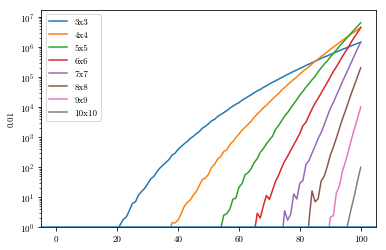

In [5]:
semilogy(x, avgSols_3, label='3x3')
semilogy(x, avgSols_4, label='4x4')
semilogy(x, avgSols_5, label='5x5')
semilogy(x, avgSols_6, label='6x6')
semilogy(x, avgSols_7, label='7x7')
semilogy(x, avgSols_8, label='8x8')
semilogy(x, avgSols_9, label='9x9')
semilogy(x, avgSols_10, label='10x10')
axhline(1)
ylabel(0.01)
legend()
ylim(bottom=1)
xlabel('');

### % at least one solution

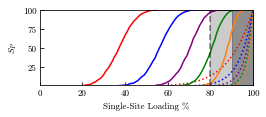

In [6]:
f, ax = subplots()
f.set_size_inches([3.7,1.5])
#f.set_size_inches([10,10])
f.subplots_adjust(left=0.15,bottom=0.25,right=0.95,top=0.95)
ax.plot(x, boolAvg_3,'-r')
ax.plot(x, singleAvg_3,':r',label='3x3')
ax.plot(x, boolAvg_4,'-b')
ax.plot(x, singleAvg_4,':b',label='4x4')
ax.plot(x, boolAvg_5,'-',color='purple')
ax.plot(x, singleAvg_5,':',label='5x5',color='purple')
ax.plot(x, boolAvg_6,'-g')
ax.plot(x, singleAvg_6,':g',label='6x6')
ax.plot(x, boolAvg_7,'-',color='tab:orange')
ax.plot(x, singleAvg_7,':',color='tab:orange',label='7x7')

"""
# these are inaccessible and it's obvious that they will be after seeing 7x7
plot(x, boolAvg_8,'-b')
plot(x, singleAvg_8,':b',label='8x8')
plot(x, boolAvg_9,'-',color='tab:orange')
plot(x, singleAvg_9,':',color='tab:orange',label='9x9')
plot(x, boolAvg_10,'-m')
plot(x, singleAvg_10,':m',label='10x10')
"""

ax.axvline(80, color='k',dashes=[4,2],alpha=0.5)
ax.fill_betweenx([0,100],[80,80],[100,100],color='k',alpha=0.2)
ax.fill_betweenx([0,100],[90,90],[100,100],color='k',alpha=0.3)
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
#, label='inaccesible');
ax.set_xlim(0,100)
ax.set_ylim(1,100)
#ax.set_yticks([0,25,50,75,100])
#grid(True,color='#505050')
ax.set_xlabel('Single-Site Loading %')
ax.set_ylabel('$S_P$')
savefig('Rerng_Simulations.svg',transparent=True, dpi=400);

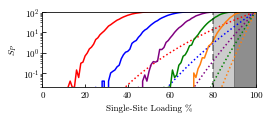

In [7]:
f, ax = subplots()
f.set_size_inches([3.7,1.5])
#f.set_size_inches([10,10])
f.subplots_adjust(left=0.15,bottom=0.25,right=0.95,top=0.95)
ax.semilogy(x, boolAvg_3,'-r')
ax.semilogy(x, singleAvg_3,':r',label='3x3')
ax.semilogy(x, boolAvg_4,'-b')
ax.semilogy(x, singleAvg_4,':b',label='4x4')
ax.semilogy(x, boolAvg_5,'-',color='purple')
ax.semilogy(x, singleAvg_5,':',label='5x5',color='purple')
ax.semilogy(x, boolAvg_6,'-g')
ax.semilogy(x, singleAvg_6,':g',label='6x6')
ax.semilogy(x, boolAvg_7,'-',color='tab:orange')
ax.semilogy(x, singleAvg_7,':',color='tab:orange',label='7x7')

"""
# these are inaccessible and it's obvious that they will be after seeing 7x7
plot(x, boolAvg_8,'-b')
plot(x, singleAvg_8,':b',label='8x8')
plot(x, boolAvg_9,'-',color='tab:orange')
plot(x, singleAvg_9,':',color='tab:orange',label='9x9')
plot(x, boolAvg_10,'-m')
plot(x, singleAvg_10,':m',label='10x10')
"""

ax.axvline(80, color='k',dashes=[4,2],alpha=0.5)
ax.fill_betweenx([0,100],[80,80],[100,100],color='k',alpha=0.2)
ax.fill_betweenx([0,100],[90,90],[100,100],color='k',alpha=0.3)
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
#, label='inaccesible');
ax.set_xlim(0,100)
ax.set_ylim(0.02,100)
#ax.set_yticks([0,25,50,75,100])
#grid(True,color='#505050')
ax.set_xlabel('Single-Site Loading %')
ax.set_ylabel('$S_P$')
savefig('Rerng_Simulations_semilogy.svg',transparent=True, dpi=400);

### % at least one solution loading only

#### normal

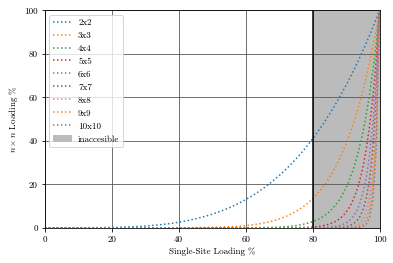

In [8]:
plot(x, np.array([(x_/100)**4 for x_ in x])*100,':',label='2x2')
plot(x, singleAvg_3,':',label='3x3')
plot(x, singleAvg_4,':',label='4x4')
plot(x, singleAvg_5,':',label='5x5')
plot(x, singleAvg_6,':',label='6x6')
plot(x, singleAvg_7,':',label='7x7')
# these are inaccessible and it's obvious that they will be after seeing 7x7
plot(x, singleAvg_8,':',label='8x8')
plot(x, singleAvg_9,':',color='tab:orange',label='9x9')
plot(x, singleAvg_10,':',label='10x10')
axvline(80,color='k')
fill_betweenx([0,100],[80,80],[100,100],color='#BBBBBB', label='inaccesible');
xlim(0,100)
legend()
ylim(0,100)
grid(True,color='#505050')
xlabel('Single-Site Loading %')
ylabel(r'$n\times n$ Loading %')
savefig('Loading_Filled_Arrays.png',transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=400);

In [11]:
x = np.array(x)

#### semilog scaling

In [19]:
singleAvg_5[85]/100

0.017197809852207896

In [20]:
singleAvg_10[85]/100

8.7476736301085886e-08

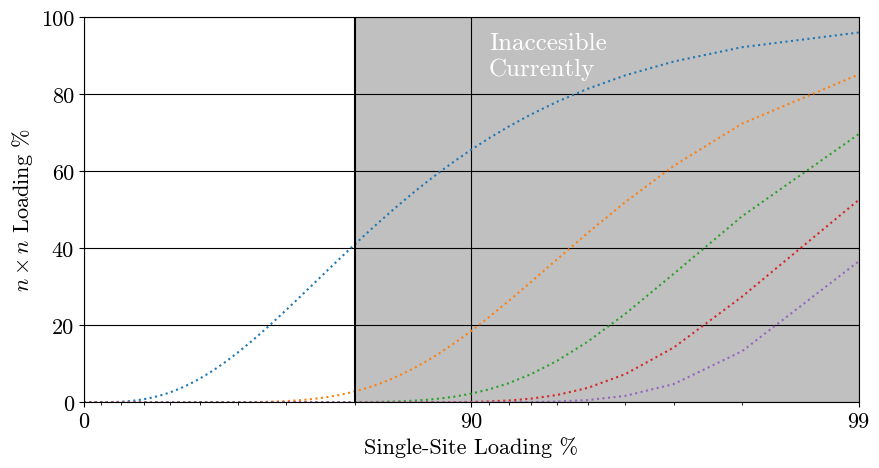

In [12]:
baseColor='k'
fs = 16
# need to put 100 at the plot's zero and then orient correclty.
f, ax = subplots(figsize=(10,5))
f.set_facecolor('#FFFFFF00')
ax.set_facecolor('#FFFFFF00')
ax.semilogx(100-x, [(x_/100)**4*100 for x_ in x],':',label='2x2')
#ax.semilogx(100-x, singleAvg_3,':',label='3x3')
ax.semilogx(100-x, singleAvg_4,':',label='4x4')
#ax.semilogx(100-x, singleAvg_5,':',label='5x5')
ax.semilogx(100-x, singleAvg_6,':',label='6x6')
#ax.semilogx(100-x, singleAvg_7,':',label='7x7')
# these are inaccessible and it's obvious that they will be after seeing 7x7
ax.semilogx(100-x, singleAvg_8,':',label='8x8')
#ax.semilogx(100-x, singleAvg_9,':',color='tab:orange',label='9x9')
ax.semilogx(100-x, singleAvg_10,':',label='10x10')
ax.axvline(20,color='k')
ax.fill_betweenx([0,100],[20,20],[0,0],color='#C0C0C0', label='inaccesible');
ax.set_xlim(100,1)
#ax.legend(fontsize=fs)#, facecolor='#00000050')
ax.text(9, 85,'Inaccesible\nCurrently', fontsize=18, color='w')
ax.set_ylim(0,100)

ax.grid(True,color=baseColor)
ax.set_xlabel('Single-Site Loading %', color=baseColor, fontsize=fs)
ax.set_ylabel(r'$n\times n$ Loading %',color=baseColor, fontsize=fs)
for sp in ax.spines:
    ax.spines[sp].set_color(baseColor)
#ax.spines['bottom'].set_color(baseColor)
#ax.spines['top'].set_color(baseColor)
ax.xaxis.label.set_color(baseColor)
ax.tick_params(axis='both', colors=baseColor)
ax.set_xticks([100,10,1])
ax.set_xticklabels(['0','90','99'], fontsize=fs)
#print(str([y for y in ax.get_yticklabels()]))
ax.set_yticklabels(['0','20', '40', '60', '80', '100'],fontsize=fs);
#ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
savefig('Loading_Filled_Arrays_Log_k.svg',transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=400);

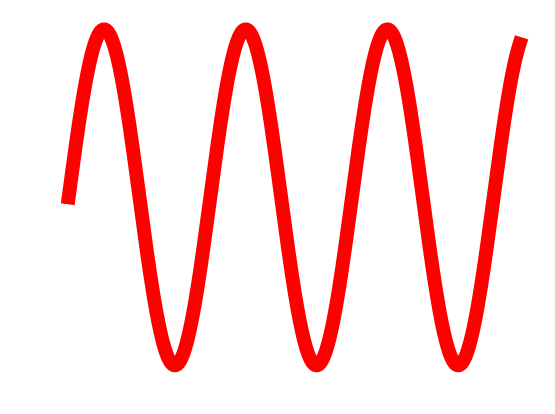

In [149]:
x = np.linspace(0,20,1000)
y = np.sin(x)
axis('off')
plot(x,y,'red', linewidth=10)
savefig('littlewave.png', transparent=True)

### semilog with sim

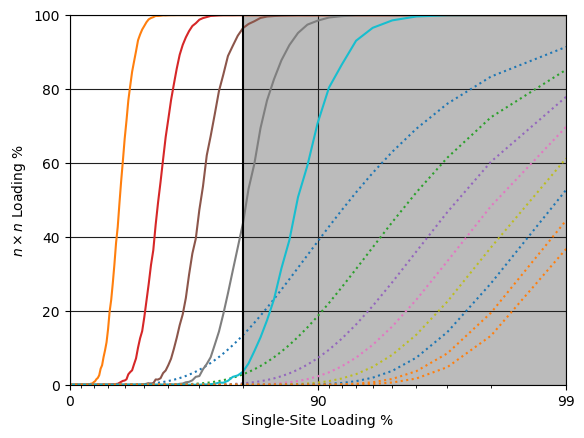

In [96]:
# need to put 100 at the plot's zero and then orient correclty.
#semilogx(100-x, [(x_/100)**4 for x_ in x],':',label='2x2')
semilogx(100-x, singleAvg_3,':',label='3x3')
semilogx(100-x, boolAvg_3)
semilogx(100-x, singleAvg_4,':',label='4x4')
semilogx(100-x, boolAvg_4)
semilogx(100-x, singleAvg_5,':',label='5x5')
semilogx(100-x, boolAvg_5)
semilogx(100-x, singleAvg_6,':',label='6x6')
semilogx(100-x, boolAvg_6)
semilogx(100-x, singleAvg_7,':',label='7x7')
semilogx(100-x, boolAvg_7)
# these are inaccessible and it's obvious that they will be after seeing 7x7
semilogx(100-x, singleAvg_8,':',label='8x8')
semilogx(100-x, singleAvg_9,':',color='tab:orange',label='9x9')
semilogx(100-x, singleAvg_10,':',label='10x10')
axvline(20,color='k')
fill_betweenx([0,100],[20,20],[0,0],color='#BBBBBB', label='inaccesible');
xlim(100,1)
#legend()
ylim(0,100)
xticks([100,10,1],['0','90','99'])
grid(True,color='#202020')
xlabel('Single-Site Loading %')
ylabel(r'$n\times n$ Loading %')
savefig('Loading_Filled_Arrays_Log.png',transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=400);

### old v?

In [12]:
singleAvgData = [singleAvg_3,singleAvg_4,singleAvg_5,singleAvg_6,singleAvg_7];

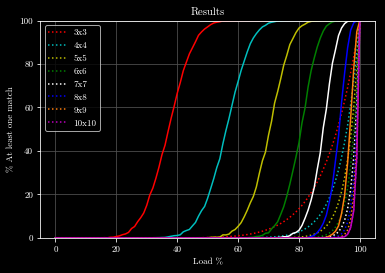

In [45]:
plot(x, boolAvg_3,'-r')
plot(x, singleAvg_3,':r',label='3x3')
plot(x, boolAvg_4,'-c')
plot(x, singleAvg_4,':c',label='4x4')
plot(x, boolAvg_5,'-y')
plot(x, singleAvg_5,':y',label='5x5')
plot(x, boolAvg_6,'-g')
plot(x, singleAvg_6,':g',label='6x6')
plot(x, boolAvg_7,'-w')
plot(x, singleAvg_7,':w',label='7x7')
plot(x, boolAvg_8,'-b')
plot(x, singleAvg_8,':b',label='8x8')
plot(x, boolAvg_9,'-',color='tab:orange')
plot(x, singleAvg_9,':',color='tab:orange',label='9x9')
plot(x, boolAvg_10,'-m')
plot(x, singleAvg_10,':m',label='10x10')
legend()
ylim(0,100)
grid(True,color='#505050')
xlabel('Load %')
ylabel('% At least one match')
title('Results');

### later analysis

In [14]:
nums = []
data = []
with open('Fast_Lazy_Rerng_Sim_long.csv') as f:
    lines = f.readlines()
    for line in lines:
        ls = line.split(',')
        data.append([float(x) for x in ls[1:-1]])
        nums.append(ls[0])

In [15]:
print(data[3][59]*100,data[3][79]*100)

0.016 37.442


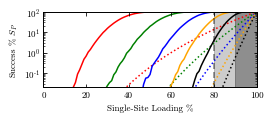

In [21]:
f, ax = subplots()
f.set_size_inches([3.7,1.5])
colors = ['r','g','b','orange','k']
labels = ['3x3','4x4','5x5','6x6','7x7']
f.subplots_adjust(left=0.15,bottom=0.25,right=0.95,top=0.95)
for d, sa, c, l in zip(data, singleAvgData,colors,labels):
    semilogy(arr(d)*100,color=c,label=l)
    semilogy(sa,linestyle=':',color=c)

ax.axvline(80, color='k',dashes=[4,2],alpha=0.5)
ax.fill_betweenx([0,100],[80,80],[100,100],color='k',alpha=0.2)
ax.fill_betweenx([0,100],[90,90],[100,100],color='k',alpha=0.3)
ax.set_xlim(0,100)
ax.set_ylim(0.02,100)
ta_x = ax.twinx()
ta_x.set_yscale('log')
ta_x.set_ylim(ax.get_ylim())
ta_x.set_yticklabels([])
ta_y = ax.twiny()
ta_y.set_xlim(ax.get_xlim())
ta_y.set_xticklabels([])
for a in ax, ta_x, ta_y:
    a.get_yaxis().set_tick_params(which='both',direction='in')
    a.get_xaxis().set_tick_params(which='both',direction='in')
ax.set_xlabel('Single-Site Loading %')
ax.set_ylabel('Success % $S_P$')
savefig('Rerng_Simulations_semilogy.svg',transparent=True, dpi=400);